# Data Visualization examples with the Titanic Dataset

This notebook demonstrates common data visualizations used in data science using the **Titanic dataset** from Kaggle.

**Dataset:** Titanic – Machine Learning from Disaster (https://www.kaggle.com/competitions/titanic/data?select=train.csv)  
**File used:** `train.csv`

### Graphs and Plots included:  
**Distribution plots:**
* Histogram
* Density plot
* Box plot
* Violin plot   

**Categorical plots:**
* Bar chart
* Pie chart  

**Relationship plots:**
* Line graph
* Scatter plot
* Hexagonal binning 
* Contour plot

## Setup and Data Loading

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Distribution
We explore the distribution of passenger **Age** and **Fare**.

In [2]:
age = df['Age'].dropna()
fare = df['Fare']

### Histogram showing the distribution of passenger ages.

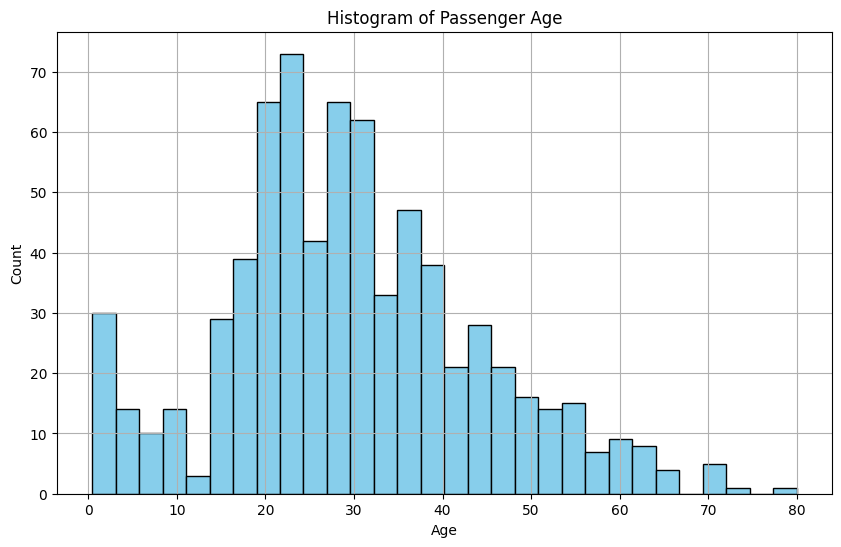

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(age, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Passenger Age')
plt.grid(True)
plt.show()

### Density plot showing a smoothed age distribution.
The graph suggests there are values between 68-70, but we can see from the histogram that there are no actual data points.

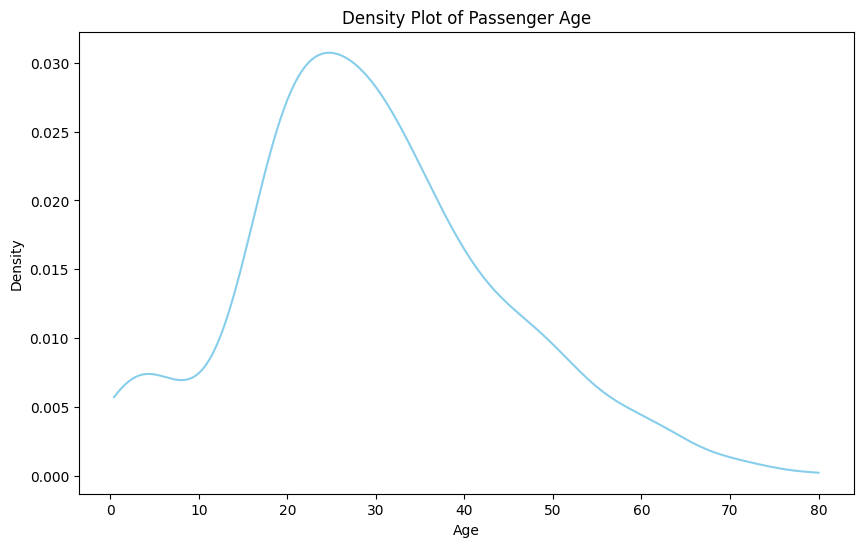

In [49]:
density = gaussian_kde(age)
xs = np.linspace(age.min(), age.max(), 200)
plt.figure(figsize=(10, 6))
plt.plot(xs, density(xs), color='skyblue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Passenger Age')

plt.show()

### Both density and histogram plots for comparison.

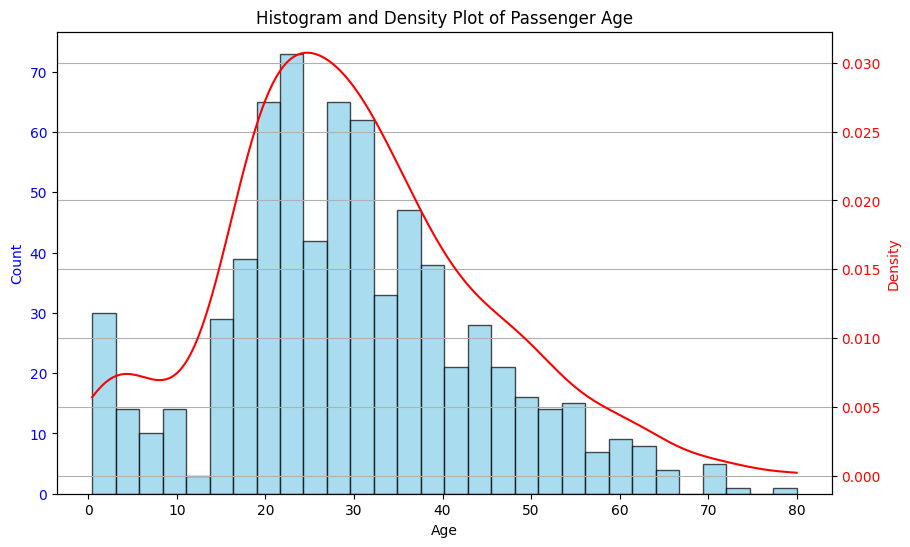

In [51]:
# plot both density and histogram on the same figure for better comparison
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(age, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(xs, density(xs), color='red')
ax2.set_ylabel('Density', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Histogram and Density Plot of Passenger Age')
plt.grid(True)
plt.show()

### Box plot showing age distribution and outliers.

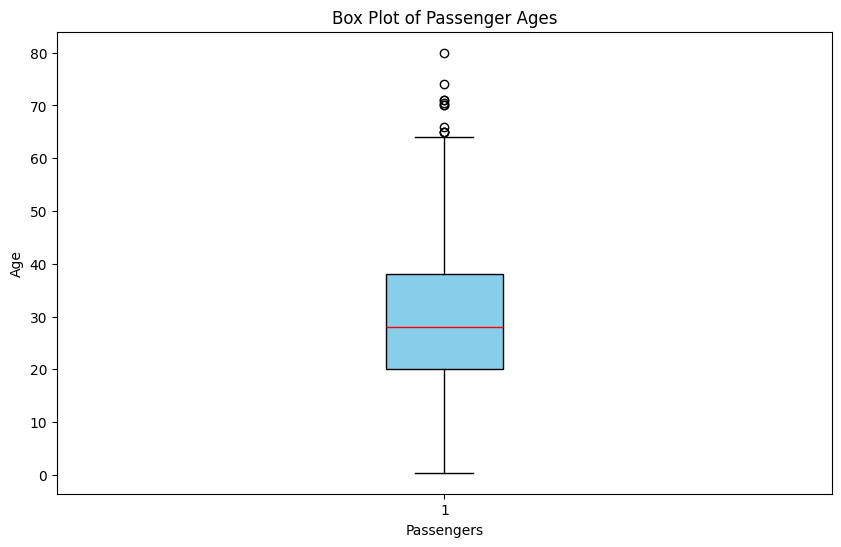

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot(age, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))
plt.xlabel('Passengers')
plt.ylabel('Age')
plt.title('Box Plot of Passenger Ages')
plt.show()

### Comparison of two sets using box plots.

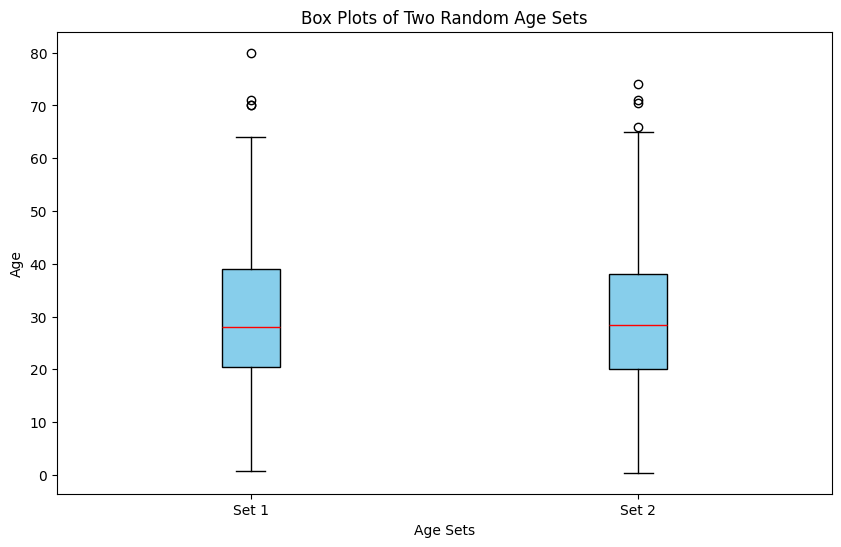

In [54]:
chi = np.random.choice([0, 1], size=len(age))
age_set1 = age[chi == 0]
age_set2 = age[chi == 1]
plt.figure(figsize=(10, 6))
plt.boxplot([age_set1, age_set2], patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'))
plt.xticks([1, 2], ['Set 1', 'Set 2'])
plt.xlabel('Age Sets')
plt.ylabel('Age')
plt.title('Box Plots of Two Random Age Sets')
plt.show()

### Violin plot showing age distribution and density.

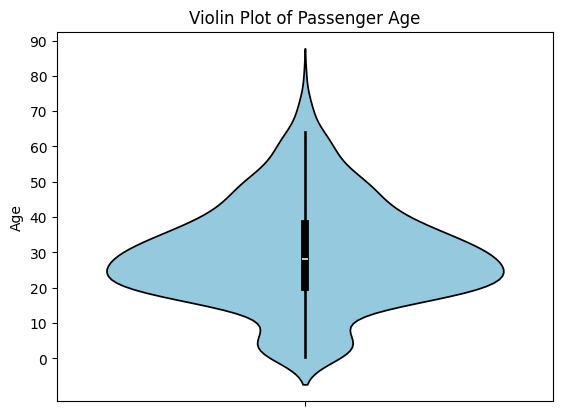

In [71]:
# make violin plot look nicer

plt.figure()
sns.violinplot(y=age, color='skyblue', linecolor='black', )
plt.title('Violin Plot of Passenger Age')
# show more values on y-axis
plt.yticks(np.arange(0, 91, 10))  
plt.show()

## 2. Categorical Data

In [13]:
sex_counts = df['Sex'].value_counts()
survival_counts = df['Survived'].value_counts()

### Bar chart comparing passenger counts by sex.

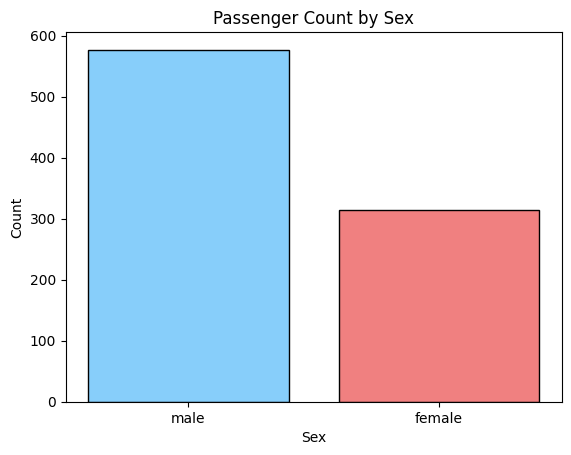

In [73]:
# make bar plot look nicer
plt.figure()
plt.bar(sex_counts.index, sex_counts.values, color=['lightskyblue', 'lightcoral'], edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Passenger Count by Sex')
plt.show()

### Pie chart showing survival proportions.

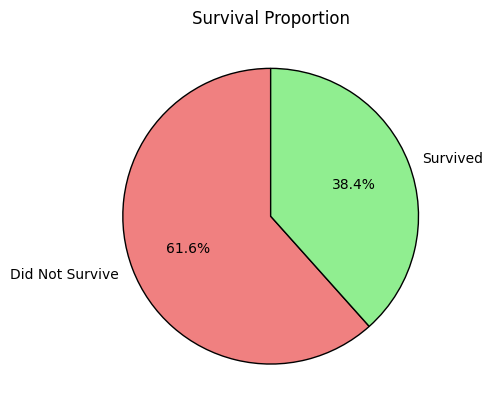

In [81]:
plt.figure()
plt.pie(survival_counts.values, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Survival Proportion')
plt.show()

## 3. Correlation and Relationships

### Line graph showing how average fare varies by age group.

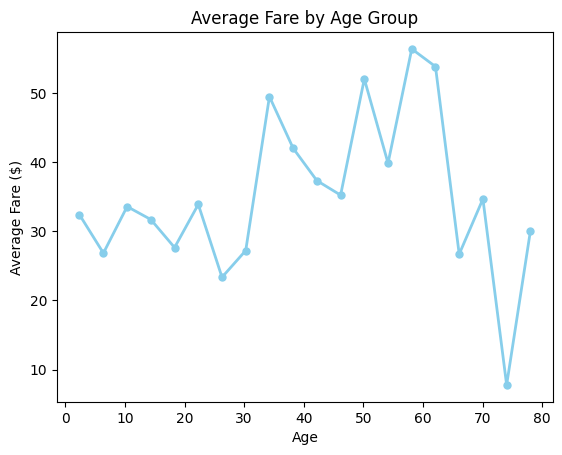

In [141]:
df_corr = df[['Age', 'Fare']].dropna()
age_bins = pd.cut(df_corr['Age'], bins=20)
avg_fare_by_age = df_corr.groupby(age_bins, observed=False)['Fare'].mean()
age_midpoints = [interval.mid for interval in avg_fare_by_age.index]

plt.figure()
plt.plot(age_midpoints, avg_fare_by_age.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Age')
plt.ylabel('Average Fare ($)')
plt.title('Average Fare by Age Group')
plt.show()

### Scatter plot showing relationship between age and fare.

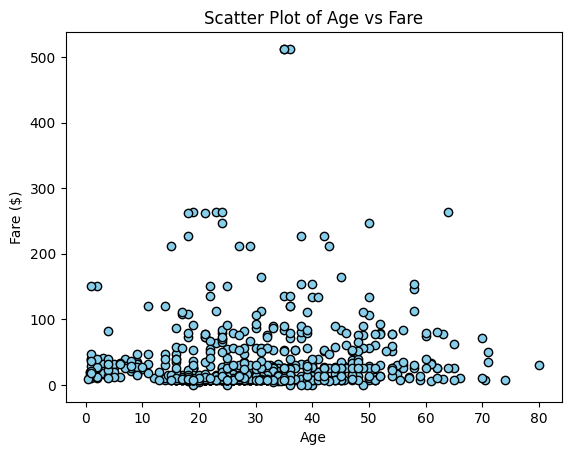

In [107]:
plt.figure()
plt.scatter(df_corr['Age'], df_corr['Fare'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Fare ($)')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

### Hexagonal binning to show density of age vs fare.

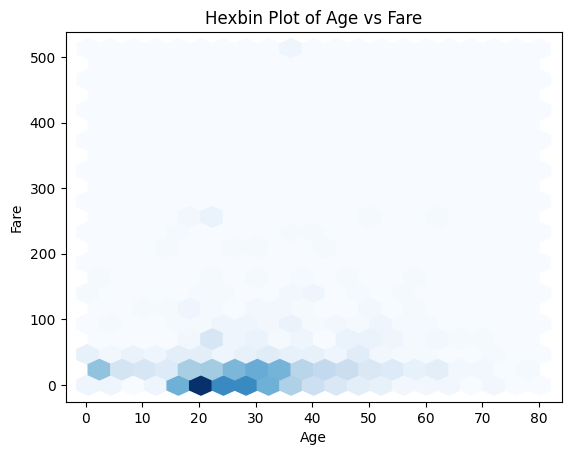

In [32]:
plt.figure()
plt.hexbin(df_corr['Age'], df_corr['Fare'], gridsize=20, cmap='Blues') 
plt.xlabel('Age')
plt.ylabel('Fare ($)')
plt.title('Hexbin Plot of Age vs Fare')
plt.show()

### Contour plot highlighting regions of similar fare density.

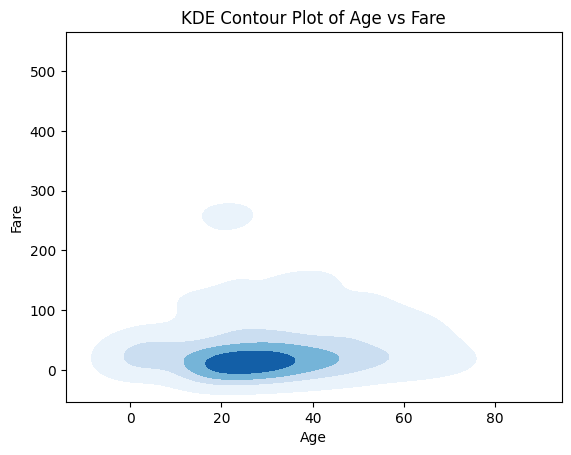

In [143]:
x = df_corr['Age'].values
y = df_corr['Fare'].values

# contour using seaborn kdeplot
plt.figure()
sns.kdeplot(x=x, y=y, fill=True, cmap='Blues', levels=5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('KDE Contour Plot of Age vs Fare')
plt.show()  
